In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# menyambungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data dari drive
train_path = '/content/drive/MyDrive/Fruity Nutrition/Training'
test_path = '/content/drive/MyDrive/Fruity Nutrition/Testing'
df = pd.read_csv('/content/drive/MyDrive/Fruity Nutrition/fruitsnutrition.csv')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# membuat generator data training dengan augmentasi supaya data lebih beragam
train_datagen = ImageDataGenerator(rescale = 1./255, #normalisasi nilai piksel [0,1]
                             rotation_range=40, #rotasi gambar 40 derajat
                             width_shift_range=0.1, #perpindahan acak secara horizontal dari lebar gambar
                             height_shift_range=0.1, #perpindahan acak secara vertikal dari tinggi gambar
                             horizontal_flip=True, #membalik gambar secara horizontal
                             validation_split=0.2 #memisahkan 20% data untuk validasi
                            )

# membuat generator untuk data validasi
val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)

# membuat generator untuk data testing
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# membuat dataset untuk data training
train_ds = train_datagen.flow_from_directory(
    train_path,
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical',
    subset="training",
    seed=123
)

# membuat dataset untuk data validation
validation_ds = val_datagen.flow_from_directory(
    train_path,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset="validation",
    seed=123
)

# membuat dataset untuk data testing
test_ds = train_datagen.flow_from_directory(
    test_path,
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical'
)

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
# import arsitektur dari CNN yaitu ResNet50V2
from tensorflow.keras.applications import ResNet50V2

Resnet50_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')

# membekukan layer pada model dasar ResNet50V2
Resnet50_base.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Sequential

# membuat model sequential
model = Sequential()

# menambahkan model dasar ResNet50V2
model.add(Resnet50_base)

# untuk menormalkan output dari model dasar
model.add(BatchNormalization())

# menonaktifkan 35% neuron pada model untuk mengurangi overfitting
model.add(Dropout(0.35))

# lapisan fully connected dengan 220 unit, untuk menangkap fitur dasar seperti pola, bentuk, atau warna pada gambar
model.add(Dense(220, activation='relu'))

# lapisan fully connected dengan 60 unit, untuk menyaring informasi yang relevan
model.add(Dense(60, activation='relu'))

# lapisan output dengan 10 unit, untuk menghasilkan probabilitas tiap kelas
model.add(Dense(10, activation='softmax'))

In [ ]:
base_learning_rate = 0.0001

# kompilasi model dengan optimizer Adam yang adaptif sehingga pelatihan/training dapat lebih efisien
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='categorical_crossentropy', metrics=['accuracy'])
# categorical crossentropy digunakan untuk multiclass classification

In [ ]:
# melatih model dengan data training dan data validation
history= model.fit(train_ds,
    validation_data=validation_ds,
    epochs=10 #epoch dilakukan sebanyak 10 kali
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 327s 11s/step - accuracy: 0.1168 - loss: 2.6133 - val_accuracy: 0.3450 - val_loss: 1.9377
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.3803 - loss: 1.8922 - val_accuracy: 0.6450 - val_loss: 1.5190
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.6033 - loss: 1.3217 - val_accuracy: 0.7450 - val_loss: 1.2077
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 204s 8s/step - accuracy: 0.7321 - loss: 0.9897 - val_accuracy: 0.8100 - val_loss: 0.9799
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 197s 8s/step - accuracy: 0.7746 - loss: 0.7920 - val_accuracy: 0.8550 - val_loss: 0.8065
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 195s 8s/step - accuracy: 0.8338 - loss: 0.6524 - val_accuracy: 0.8900 - val_loss: 0.6766
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.8817 - loss: 0.5447 - val_accuracy: 0.8950 - val_loss: 0.5724
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 207s 8s/step - accuracy: 0.8829 - loss: 0.4714 - val_accuracy: 0.9000 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


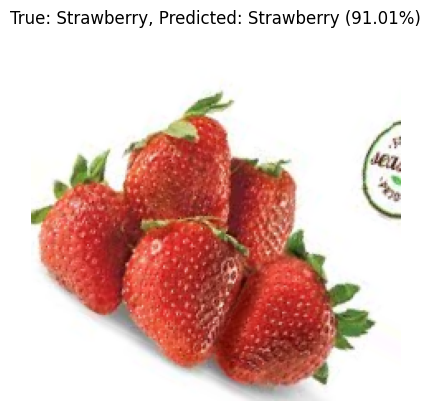

Nutrisi untuk Strawberry:
  energy (kcal/kJ): 32/136
  water (g): 90.95
  protein (g): 0.67
  total fat (g): 0.3
  carbohydrates (g): 7.68
  fiber (g): 2.0
  sugars (g): 4.89
  calcium (mg): 16
  iron (mg): 0.41
  magnessium (mg): 13
  phosphorus (mg): 24
  potassium (mg): 153
  sodium (g): 1
  vitamin A (IU): 12
  vitamin C (mg): 58.8
  vitamin B1 (mg): 0.024
  vitamin B2 (mg): 0.022
  viatmin B3 (mg): 0.386
  vitamin B5 (mg): 0.125
  vitamin B6 (mg): 0.047
  vitamin E (mg): 0.29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


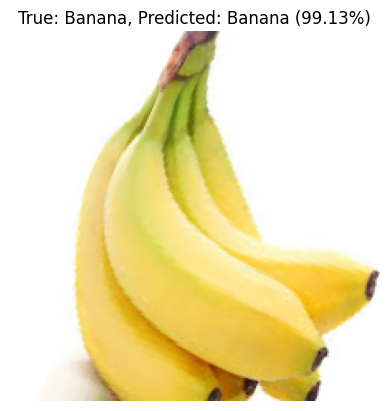

Nutrisi untuk Banana:
  energy (kcal/kJ): 89/371
  water (g): 74.91
  protein (g): 1.09
  total fat (g): 0.33
  carbohydrates (g): 22.84
  fiber (g): 2.6
  sugars (g): 12.23
  calcium (mg): 5
  iron (mg): 0.26
  magnessium (mg): 27
  phosphorus (mg): 22
  potassium (mg): 358
  sodium (g): 1
  vitamin A (IU): 64
  vitamin C (mg): 8.7
  vitamin B1 (mg): 0.031
  vitamin B2 (mg): 0.073
  viatmin B3 (mg): 0.665
  vitamin B5 (mg): 0.334
  vitamin B6 (mg): 0.367
  vitamin E (mg): 0.1


In [ ]:
# menampilkan prediksi dari data testing
import matplotlib.pyplot as plt
import numpy as np

img_width, img_height = 224, 224

# label kategori dari dataset
data_cat = list(test_ds.class_indices.keys())


def visualize_predictions(num_images=2):
    for i in range(num_images):
        # untuk memunculkan label yang benar dari gambar
        images, true_labels = next(test_ds)
        image = images[0]
        true_label_index = np.argmax(true_labels[0])
        true_label = data_cat[true_label_index]

        # prediksi model untuk gambar yang ada
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_class_index = np.argmax(prediction)
        predicted_class = data_cat[predicted_class_index]
        confidence = prediction[0][predicted_class_index]

        # menampilkan hasil prediksi
        plt.figure()
        plt.imshow(image)
        plt.title(f"True: {true_label}, Predicted: {predicted_class} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()

        # menampilkan informasi data nutrisi berdasarkan prediksi
        def show_nutrition(fruit_name):
            fruit_name = fruit_name.lower()
            result = df[df['fruit'].str.lower() == fruit_name]
            if not result.empty:
                print(f"Nutrisi untuk {fruit_name.capitalize()}:")
                for column in result.columns[1:]:
                    print(f"  {column}: {result.iloc[0][column]}")
            else:
                print(f"Maaf, data nutrisi untuk {fruit_name} tidak ditemukan.")

        show_nutrition(predicted_class)

visualize_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


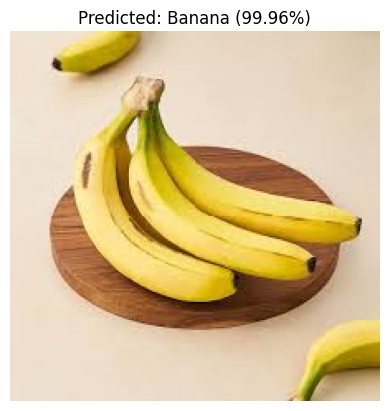

Nutrisi untuk Banana:
  energy (kcal/kJ): 89/371
  water (g): 74.91
  protein (g): 1.09
  total fat (g): 0.33
  carbohydrates (g): 22.84
  fiber (g): 2.6
  sugars (g): 12.23
  calcium (mg): 5
  iron (mg): 0.26
  magnessium (mg): 27
  phosphorus (mg): 22
  potassium (mg): 358
  sodium (g): 1
  vitamin A (IU): 64
  vitamin C (mg): 8.7
  vitamin B1 (mg): 0.031
  vitamin B2 (mg): 0.073
  viatmin B3 (mg): 0.665
  vitamin B5 (mg): 0.334
  vitamin B6 (mg): 0.367
  vitamin E (mg): 0.1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_visualize(image_path):
    # memproses gambar
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # melakukan prediksi
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = data_cat[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # menampilkan hasil prediksi
    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    # menampilkan informasi data nutrisi berdasarkan prediksi
    def show_nutrition(fruit_name):
            fruit_name = fruit_name.lower()
            result = df[df['fruit'].str.lower() == fruit_name]
            if not result.empty:
                print(f"Nutrisi untuk {fruit_name.capitalize()}:")
                for column in result.columns[1:]:
                    print(f"  {column}: {result.iloc[0][column]}")
            else:
                print(f"Maaf, data nutrisi untuk {fruit_name} tidak ditemukan.")

    show_nutrition(predicted_class)

# input gambar yang ingin diprediksi
image_path = '/content/pisang.jpeg'

predict_and_visualize(image_path)

In [ ]:
# menyimpan model dalam format h5
model.save('my_model.h5')